# Kruskal-Wallis test

### Aim and hypotheses

 The focus is on exploring the potential influence of gender as an independent variable on the response scores, which are measured on an ordinal scale. By conducting the Kruskal-Wallis test, we seeks to determine if there are statistically significant differences in the response scores across the three gender groups.
 
 
Research question:
Does the gender of individuals (non-binary, male, and female) have a significant influence on the influence scores?
 

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from getdata import DataSlicer
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

####  Import dataset 

In [2]:
# Create an instance of the DataSlicer class
data_path = r"C:\phaseII\static\dataset-individual-Items.csv"
data_slicer = DataSlicer(data_path)
# # Call the functions on the data_slicer instance
df = data_slicer.read_data()
df_avg = data_slicer.average_scores()


#### Hypothesis

In [ ]:
# Data preparation

In [3]:
non_binary = df_avg[df_avg['gender'] == 1]
female = df_avg[df_avg['gender'] == 2]
male = df_avg[df_avg['gender'] == 0]

In [4]:
print('Non binary total:',non_binary.shape[0])
print('Female total:',female.shape[0])
print('Male total:',male.shape[0])

Non binary total: 108
Female total: 946
Male total: 941


In [6]:

def generate_boxplot(data, labels):
    
    # Creating a figure and axes
    fig, ax = plt.subplots()

    # Boxplot properties
    boxprops = dict(facecolor='white', color='black', linewidth=1.5)
    medianprops = dict(color='red', linewidth=2.5)
    whiskerprops = dict(color='black', linewidth=1.5)
    capprops = dict(color='black', linewidth=1.5)

    # Creating the boxplot
    boxplot = ax.boxplot(data, patch_artist=True, labels=labels,
                         boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops)

    # Set colors for each group
    colors = ['purple', 'pink', 'blue']
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)

    # Calculate standard deviations
    std_devs = [np.std(group) for group in data]

    # Adding title and labels
    title = 'Comparison of Social Proof by Gender (Std:'
    for i in range(len(labels)):
        title += ' {}: {:.2f},'.format(labels[i], std_devs[i])
    title = title[:-1] + ')'
    ax.set_title(title)
    ax.set_xlabel('Gender')
    ax.set_ylabel(' Authority')

    # Setting the y-axis limits
    ax.set_ylim([0, max([max(group) for group in data]) + 1])

    # Adding a grid
    ax.grid(True, axis='y')

    # Show the plot
    plt.show()
    
labels = ['Non-Binary', 'Female', 'Male']

In [ ]:
#Kruskal-Wallis test

In [7]:
def perform_Kruskal_Wallis(groups, group_names=None):
    #  Kruskal-Wallis test
    
    # Calculate degrees of freedom
    k = len(groups)  # Number of groups
    n = len(groups[0])  # Total sample size 
    df = k - 1
    
    # Perform the Kruskal-Wallis test
    statistic, p_value = stats.kruskal(*groups)
    p_value = max(0.0, min(p_value * k, 1.0))  # Bound the p-value between 0 and 1

    # Perform Dunn's test with Bonferroni adjustment
    dunn_results = scikit_posthocs.posthoc_dunn(groups, p_adjust='bonferroni')

  

    # Calculate chi-square value
    chi2 = (n - 1) * p_value

    
    # Determine if the null hypothesis is rejected
    alpha = 0.05
    reject_null = p_value < alpha
    

    # Bonferroni-adjusted significance level
    bonf_alpha = alpha / len(groups)

    # Calculate adjusted p-value
    adjusted_p_value = max(0.0, min(p_value * k, 1.0))  # Bonferroni-adjusted p-value (bounded between 0 and 1)

    # Determine significance after Bonferroni correction
    significance_after_correction = 'Yes' if adjusted_p_value <= bonf_alpha else 'No'

    # Prepare the table
    table = [
        ['Test', 'Value'],
        ['Chi-square', chi2],
        ['Degrees of Freedom', df],
        ['p-value', p_value],
        ['Bonferroni-adjusted significance level', '{:.4f}'.format(bonf_alpha)],
        ['Adjusted p-value', '{:.4f}'.format(adjusted_p_value)],
        ['Significance after Bonferroni correction', significance_after_correction]
    ]

    # Print the table using tabulate with fancy_grid
    print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

    # Print the p-value
    print("Kruskal-Wallis p-value:", p_value)

    # Print the significance (reject or not reject)
    significance = 'Significant' if reject_null else 'Not Significant'
    print("Result:", significance)
    print('-----------------------------')
    print()

    # Print the pairwise comparison results
    print("Dunn's Pairwise Comparison:")
    labels = group_names or [str(i) for i in range(len(groups))]  # Use indices as labels if not provided
    table = [['Pairwise Comparison', 'p-value']]

    for i in range(len(dunn_results)):
        for j in range(i+1, len(dunn_results)):
            comp = f"{labels[i]} vs {labels[j]}"
            p_value = max(0.0, min(dunn_results.iloc[i, j], 1.0))  # Bound the p-value between 0 and 1
            table.append([comp, p_value])

    # Print the table using tabulate with fancy_grid
    print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


##### Select the group to be tested

In [ ]:
# group1 = [1, 2, 3]
# group2 = [4, 5, 6]
# group3 = [7, 8, 9]

# groups = [group1, group2, group3]
# group_names = ['Group A', 'Group B', 'Group C']


### Social Proof

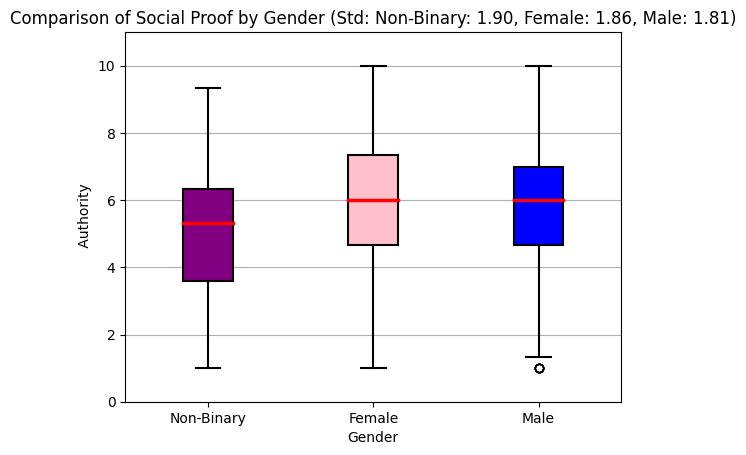

NameError: name 'group_names' is not defined

In [8]:

#Social Proof

non_binary_social_proof = non_binary['Social proof']  # Data for non-binary group
female_social_proof = female['Social proof']  # Data for female group
male_social_proof = male['Social proof']  # Data for male group

data = [non_binary_social_proof, female_social_proof, male_social_proof]

# Calls funtion for the plots
generate_boxplot(data, labels)

# Calls funtion for the test
groups = [non_binary_social_proof, female_social_proof, male_social_proof]
perform_Kruskal_Wallis(groups, group_names)


###  Framing

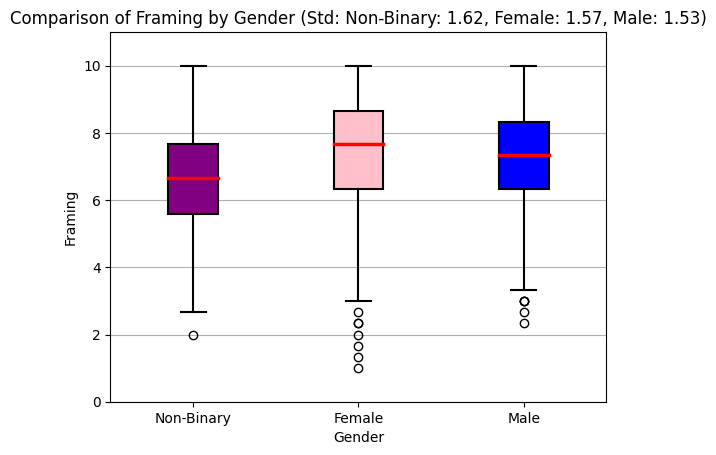

╒══════════════════════════════════════════╤═══════════════════════╕
│ Test                                     │ Value                 │
╞══════════════════════════════════════════╪═══════════════════════╡
│ Chi-square                               │ 8.908215040609194e-06 │
├──────────────────────────────────────────┼───────────────────────┤
│ Degrees of Freedom                       │ 2                     │
├──────────────────────────────────────────┼───────────────────────┤
│ p-value                                  │ 8.32543461739177e-08  │
├──────────────────────────────────────────┼───────────────────────┤
│ Bonferroni-adjusted significance level   │ 0.0167                │
├──────────────────────────────────────────┼───────────────────────┤
│ Adjusted p-value                         │ 0.0000                │
├──────────────────────────────────────────┼───────────────────────┤
│ Significance after Bonferroni correction │ Yes                   │
╘═════════════════════════════════

In [47]:
# Framing
non_binary_Framing = non_binary['Framing']
female_Framing =   female['Framing']
male_Framing =   male['Framing']

data = [non_binary_Framing,female_Framing,male_Framing]

generate_boxplot(data, labels)

groups=[non_binary_Framing,female_Framing,male_Framing]

perform_Kruskal_Wallis(groups, group_names)


### Authority



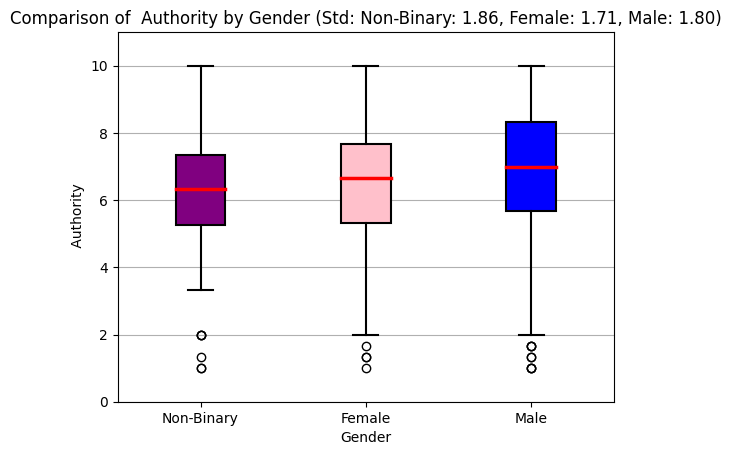

╒══════════════════════════════════════════╤════════════════════════╕
│ Test                                     │ Value                  │
╞══════════════════════════════════════════╪════════════════════════╡
│ Chi-square                               │ 0.00039325642279704903 │
├──────────────────────────────────────────┼────────────────────────┤
│ Degrees of Freedom                       │ 2                      │
├──────────────────────────────────────────┼────────────────────────┤
│ p-value                                  │ 3.675293671000458e-06  │
├──────────────────────────────────────────┼────────────────────────┤
│ Bonferroni-adjusted significance level   │ 0.0167                 │
├──────────────────────────────────────────┼────────────────────────┤
│ Adjusted p-value                         │ 0.0000                 │
├──────────────────────────────────────────┼────────────────────────┤
│ Significance after Bonferroni correction │ Yes                    │
╘═══════════════════

In [77]:
# Authority
non_binary_Authority  = non_binary['Authority']
female_Authority =  female['Authority']
male_Authority = male['Authority']
data = [non_binary_Authority,male_Authority,female_Authority]

generate_boxplot(data, labels)
groups = [non_binary_Authority,male_Authority,female_Authority]
perform_Kruskal_Wallis(groups, group_names)

### Rhetorical Question

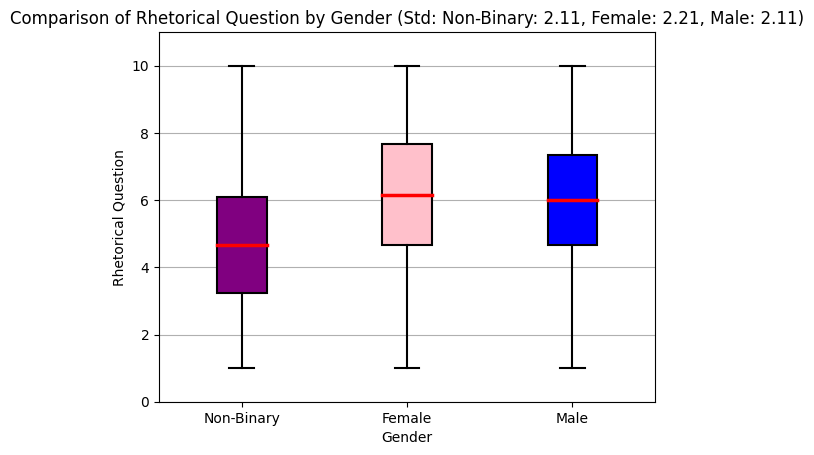

╒══════════════════════════════════════════╤═══════════════════════╕
│ Test                                     │ Value                 │
╞══════════════════════════════════════════╪═══════════════════════╡
│ Chi-square                               │ 7.734837092893975e-06 │
├──────────────────────────────────────────┼───────────────────────┤
│ Degrees of Freedom                       │ 2                     │
├──────────────────────────────────────────┼───────────────────────┤
│ p-value                                  │ 7.228819712985024e-08 │
├──────────────────────────────────────────┼───────────────────────┤
│ Bonferroni-adjusted significance level   │ 0.0167                │
├──────────────────────────────────────────┼───────────────────────┤
│ Adjusted p-value                         │ 0.0000                │
├──────────────────────────────────────────┼───────────────────────┤
│ Significance after Bonferroni correction │ Yes                   │
╘═════════════════════════════════

In [49]:
# Rhetorical Question


non_binary_Rht_Question = non_binary['Rht_Question']  # Data for non-binary group
female_Rht_Question = female['Rht_Question']
male_Rht_Question  =   male['Rht_Question']
data = [non_binary_Rht_Question, female_Rht_Question, male_Rht_Question]
generate_boxplot(data, labels)
groups = [non_binary_Rht_Question, female_Rht_Question, male_Rht_Question]
perform_Kruskal_Wallis(groups, group_names)


### Flattery

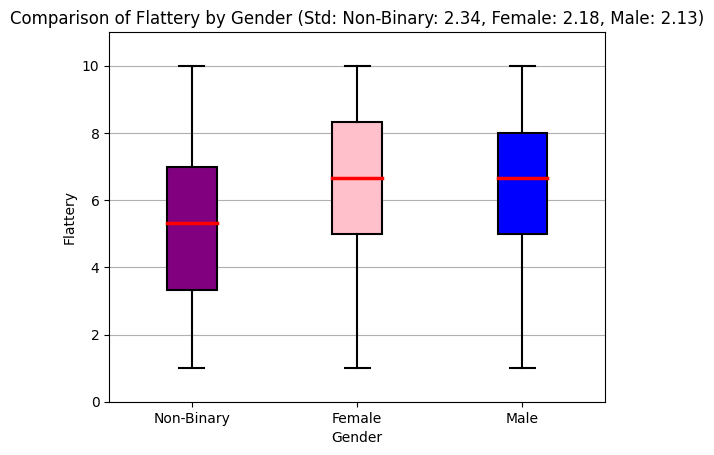

╒══════════════════════════════════════════╤═══════════════════════╕
│ Test                                     │ Value                 │
╞══════════════════════════════════════════╪═══════════════════════╡
│ Chi-square                               │ 9.00385634868776e-05  │
├──────────────────────────────────────────┼───────────────────────┤
│ Degrees of Freedom                       │ 2                     │
├──────────────────────────────────────────┼───────────────────────┤
│ p-value                                  │ 8.414819017465196e-07 │
├──────────────────────────────────────────┼───────────────────────┤
│ Bonferroni-adjusted significance level   │ 0.0167                │
├──────────────────────────────────────────┼───────────────────────┤
│ Adjusted p-value                         │ 0.0000                │
├──────────────────────────────────────────┼───────────────────────┤
│ Significance after Bonferroni correction │ Yes                   │
╘═════════════════════════════════

In [58]:
# Flattery

non_binary_Flattery = non_binary['Flattery']  # Data for non-binary group
female_Flattery = female['Flattery']
male_Flattery = male['Flattery']
data = [non_binary_Flattery, female_Flattery, male_Flattery]

generate_boxplot(data, labels)



groups = [non_binary_Flattery, female_Flattery, male_Flattery]
perform_Kruskal_Wallis(groups, group_names)


### Antanagoge

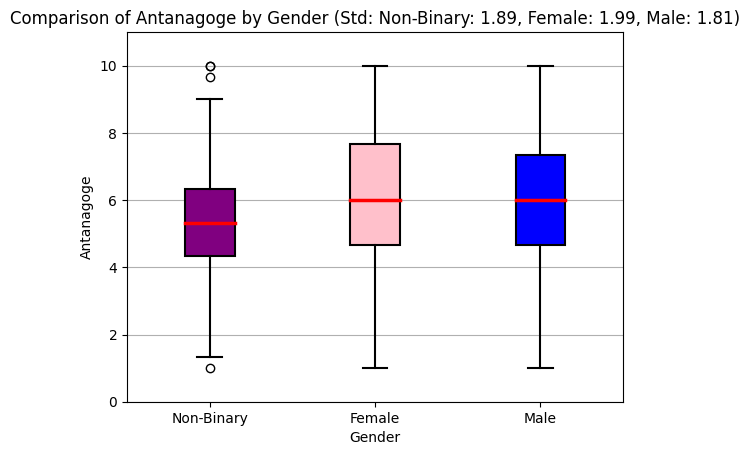

╒══════════════════════════════════════════╤═══════════════════════╕
│ Test                                     │ Value                 │
╞══════════════════════════════════════════╪═══════════════════════╡
│ Chi-square                               │ 0.12082757449864667   │
├──────────────────────────────────────────┼───────────────────────┤
│ Degrees of Freedom                       │ 2                     │
├──────────────────────────────────────────┼───────────────────────┤
│ p-value                                  │ 0.0011292296682116512 │
├──────────────────────────────────────────┼───────────────────────┤
│ Bonferroni-adjusted significance level   │ 0.0167                │
├──────────────────────────────────────────┼───────────────────────┤
│ Adjusted p-value                         │ 0.0034                │
├──────────────────────────────────────────┼───────────────────────┤
│ Significance after Bonferroni correction │ Yes                   │
╘═════════════════════════════════

In [53]:
#Antanagoge

non_binary_Antanagoge =  non_binary['Antanagoge']
female_Antanagoge = female['Antanagoge']
male_Antanagoge =  male['Antanagoge']

data = [ non_binary_Antanagoge, female_Antanagoge, male_Antanagoge]
  
generate_boxplot(data, labels)

groups = [ non_binary_Antanagoge, female_Antanagoge, male_Antanagoge]
perform_Kruskal_Wallis(groups, group_names)

### Logic

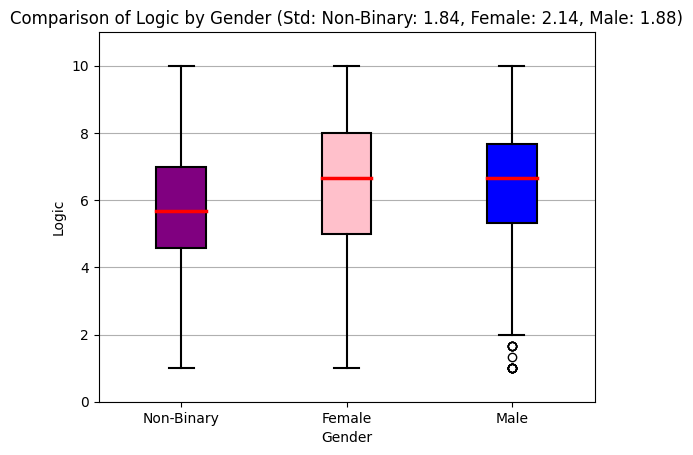

╒══════════════════════════════════════════╤══════════════════════╕
│ Test                                     │ Value                │
╞══════════════════════════════════════════╪══════════════════════╡
│ Chi-square                               │ 0.23471237184168486  │
├──────────────────────────────────────────┼──────────────────────┤
│ Degrees of Freedom                       │ 2                    │
├──────────────────────────────────────────┼──────────────────────┤
│ p-value                                  │ 0.002193573568613877 │
├──────────────────────────────────────────┼──────────────────────┤
│ Bonferroni-adjusted significance level   │ 0.0167               │
├──────────────────────────────────────────┼──────────────────────┤
│ Adjusted p-value                         │ 0.0066               │
├──────────────────────────────────────────┼──────────────────────┤
│ Significance after Bonferroni correction │ Yes                  │
╘══════════════════════════════════════════╧════

In [66]:
# +

non_binary_Logic = non_binary['Logic']  # Data for non-binary group
female_Logic = female['Logic'] 
male_Logic = male['Logic']
data = [ non_binary_Logic, female_Logic, male_Logic]
generate_boxplot(data, labels)
groups = [ non_binary_Logic, female_Logic, male_Logic]
perform_Kruskal_Wallis(groups, group_names)

### Pathos

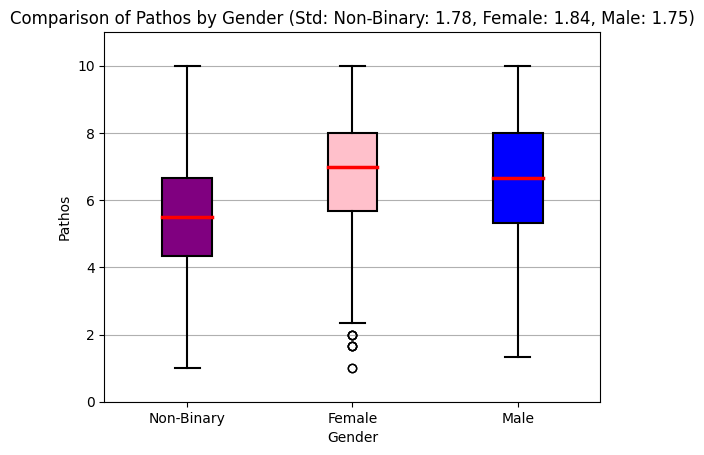

╒══════════════════════════════════════════╤════════════════════════╕
│ Test                                     │ Value                  │
╞══════════════════════════════════════════╪════════════════════════╡
│ Chi-square                               │ 1.7319806778621755e-08 │
├──────────────────────────────────────────┼────────────────────────┤
│ Degrees of Freedom                       │ 2                      │
├──────────────────────────────────────────┼────────────────────────┤
│ p-value                                  │ 1.6186735307123136e-10 │
├──────────────────────────────────────────┼────────────────────────┤
│ Bonferroni-adjusted significance level   │ 0.0167                 │
├──────────────────────────────────────────┼────────────────────────┤
│ Adjusted p-value                         │ 0.0000                 │
├──────────────────────────────────────────┼────────────────────────┤
│ Significance after Bonferroni correction │ Yes                    │
╘═══════════════════

In [68]:
# Pathos
non_binary_Pathos = non_binary['Pathos']
female_pathos = female['Pathos']
male_Pathos = male['Pathos']

data = [non_binary_Pathos,female_pathos,male_Pathos]

generate_boxplot(data, labels)

groups= [non_binary_Pathos,female_pathos,male_Pathos]

perform_Kruskal_Wallis(groups, group_names)

##  Repetition

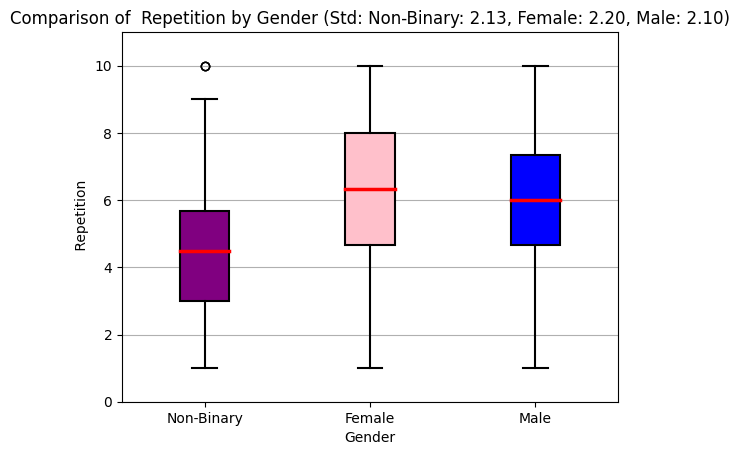

╒══════════════════════════════════════════╤════════════════════════╕
│ Test                                     │ Value                  │
╞══════════════════════════════════════════╪════════════════════════╡
│ Chi-square                               │ 3.5961641361645874e-10 │
├──────────────────────────────────────────┼────────────────────────┤
│ Degrees of Freedom                       │ 2                      │
├──────────────────────────────────────────┼────────────────────────┤
│ p-value                                  │ 3.360901061836063e-12  │
├──────────────────────────────────────────┼────────────────────────┤
│ Bonferroni-adjusted significance level   │ 0.0167                 │
├──────────────────────────────────────────┼────────────────────────┤
│ Adjusted p-value                         │ 0.0000                 │
├──────────────────────────────────────────┼────────────────────────┤
│ Significance after Bonferroni correction │ Yes                    │
╘═══════════════════

In [70]:
# Repetition

non_binary_Repetition = non_binary['Repetition']
female_Repetition = female['Repetition']
male_Repetition = male['Repetition']

data = [non_binary_Repetition,female_Repetition,male_Repetition ]
generate_boxplot(data, labels)

groups =  [non_binary_Repetition,female_Repetition,male_Repetition ]
perform_Kruskal_Wallis(groups, group_names)

###  Anaphora

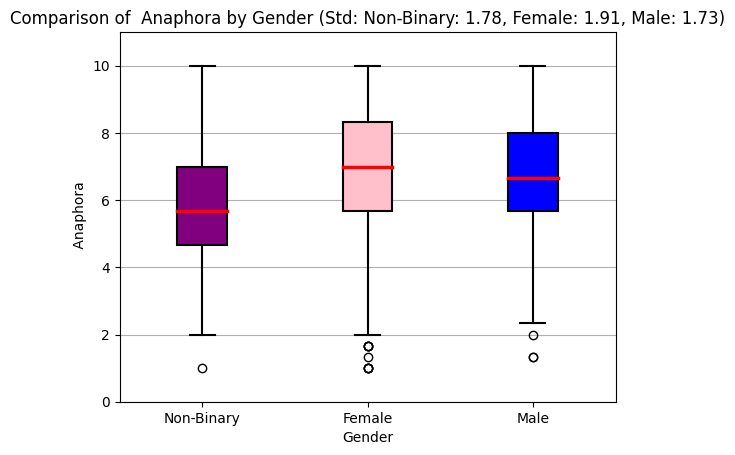

╒══════════════════════════════════════════╤════════════════════════╕
│ Test                                     │ Value                  │
╞══════════════════════════════════════════╪════════════════════════╡
│ Chi-square                               │ 1.6056973323838617e-05 │
├──────────────────────────────────────────┼────────────────────────┤
│ Degrees of Freedom                       │ 2                      │
├──────────────────────────────────────────┼────────────────────────┤
│ p-value                                  │ 1.500651712508282e-07  │
├──────────────────────────────────────────┼────────────────────────┤
│ Bonferroni-adjusted significance level   │ 0.0167                 │
├──────────────────────────────────────────┼────────────────────────┤
│ Adjusted p-value                         │ 0.0000                 │
├──────────────────────────────────────────┼────────────────────────┤
│ Significance after Bonferroni correction │ Yes                    │
╘═══════════════════

In [73]:
# Anaphora
non_binary_Anaphora =  non_binary['Anaphora']
female_Anaphora = female['Anaphora']
male_Anaphora = male['Anaphora']

data = [non_binary_Anaphora, female_Anaphora,male_Anaphora]


generate_boxplot(data, labels)

groups =  [non_binary_Anaphora, female_Anaphora,male_Anaphora]

perform_Kruskal_Wallis(groups, group_names)

<Figure size 1000x600 with 0 Axes>

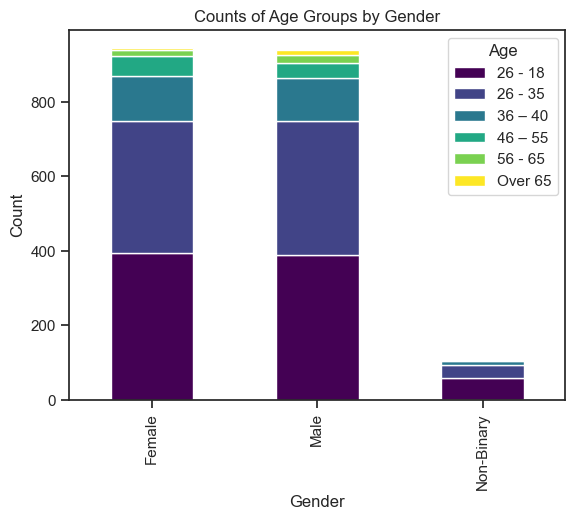

In [81]:
# Concatenate the age values from all three dataframes
ages = pd.concat([non_binary['age'], male['age'], female['age']], axis=0)
gender_labels = ['Non-Binary'] * len(non_binary) + ['Male'] * len(male) + ['Female'] * len(female)

# Create a new dataframe for plotting
data = pd.DataFrame({'Age': ages, 'Gender': gender_labels})

# Create a dictionary to map age levels to labels
age_labels = {
    0: '26 - 35',
    1: '36 – 40',
    2: '46 – 55',
    3: '56 - 65',
    4: '26 - 18',
    5: 'Over 65'
}

# Replace age levels with labels
data['Age'] = data['Age'].map(age_labels)

# Calculate the count of age groups by gender
grouped_data = data.groupby(['Gender', 'Age']).size().reset_index(name='Count')

# Pivot the data to create a matrix of counts
pivot_data = grouped_data.pivot(index='Gender', columns='Age', values='Count').fillna(0)

# Set up the plot using seaborn
sns.set(style="ticks", palette="colorblind")
plt.figure(figsize=(10, 6))

# Create the stacked bar plot
pivot_data.plot(kind='bar', stacked=True, colormap='viridis')

# Set plot title and labels
plt.title("Counts of Age Groups by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Age')

# Show the plot
plt.show()
